In [1]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Reading the dataset
datasetSD1 = pd.read_csv('./Solar_Power/Plant_1_Weather_Sensor_Data.csv')


# See the shape of the dataset
print(datasetSD1.shape)


# Some statitistics of the dataset
datasetSD1.describe()


(3182, 6)


,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [5]:
datasetSD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [10]:
datasetSD1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15


In [11]:
# adding another column for only date (without time)
datasetSD1['date'] = pd.to_datetime(datasetSD1['DATE_TIME']).dt.normalize()

In [12]:
datasetSD1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15


# What is the total irradiation per day

In [13]:
# What is the total irradiation per day
# group the rows based on "date" and take the sum from IRRADIATION column
sumIRR = datasetSD1.groupby(["date"]).IRRADIATION.sum().reset_index()

In [14]:
sumIRR.head(89)

,date,IRRADIATION
0,2020-05-15,19.037010
1,2020-05-16,18.651690
2,2020-05-17,22.931378
3,2020-05-18,15.266485
4,2020-05-19,18.044861
5,2020-05-20,18.245542
6,2020-05-21,23.556170
7,2020-05-22,22.119123
8,2020-05-23,26.106652
9,2020-05-24,24.937180


In [15]:
# It should give exactly the number of days = 34
print(sumIRR.shape)

(34, 2)


Text(0, 0.5, 'IRRADIATION per day')

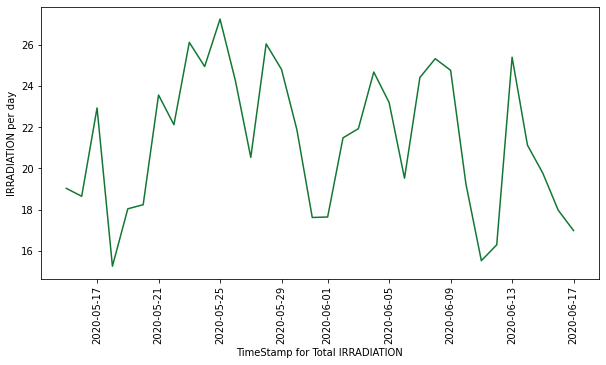

In [21]:
# plot nTimeStamp for Total IRRADIATION
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.plot(sumIRR['date'], sumIRR['IRRADIATION'], color= '#117733')
plt.xlabel('TimeStamp for Total IRRADIATION')
plt.ylabel('IRRADIATION per day')


Text(0, 0.5, 'Total IRRADIATION per day')

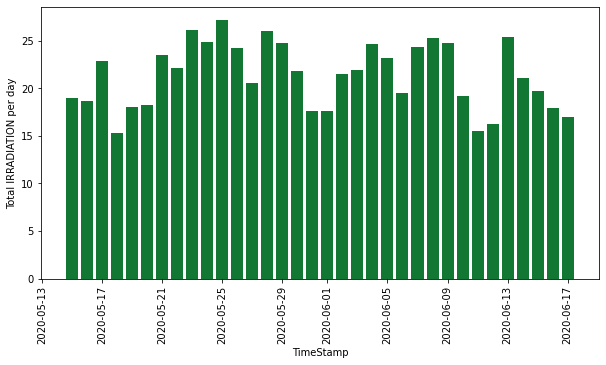

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(sumIRR['date'], sumIRR['IRRADIATION'], color= '#117733')

# Adding labels
plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('Total IRRADIATION per day')



# What is the max of Ambient temperature per day

In [18]:
# What is the max of Ambient
# group the rows based on "date" and take the sum from AMBIENT_TEMPERATURE column
maxambient = datasetSD1.groupby(["date"]).AMBIENT_TEMPERATURE.max().reset_index()

In [15]:
maxambient.head()

,date,AMBIENT_TEMPERATURE
0,2020-05-15,34.430943
1,2020-05-16,32.524149
2,2020-05-17,35.252486
3,2020-05-18,28.367100
4,2020-05-19,30.368632


In [16]:
# It should give exactly the number of days = 34
print(maxambient.shape)

(34, 2)


# The max of Ambient temperature over 34 days

In [17]:
totalMaxambient = maxambient.AMBIENT_TEMPERATURE.max()
totalMaxambient

35.25248613333334

# What is the max of MODULE

In [18]:
# What is the max of MODULE
# group the rows based on "date" and take the sum from MODULE_TEMPERATURE column
maxMODULE = datasetSD1.groupby(["date"]).MODULE_TEMPERATURE.max().reset_index()

In [19]:
maxMODULE.head()

,date,MODULE_TEMPERATURE
0,2020-05-15,55.030613
1,2020-05-16,54.232746
2,2020-05-17,63.145582
3,2020-05-18,53.936739
4,2020-05-19,51.847742


In [20]:
# It should give exactly the number of days = 34
print(maxMODULE.shape)

(34, 2)


In [21]:
totalmaxMODULE = maxMODULE.MODULE_TEMPERATURE.max()
totalmaxMODULE

65.54571366666664

# How many inverters (SOURCE_KEY) are There for each plant

In [30]:
# how many inverters (SOURCE_KEY) are There for each plant
from collections import Counter
inverters_key = Counter(datasetSD1['SOURCE_KEY']).keys()

# number of inverters
print('\n Number of inverters: ',len(inverters_key))

print('\n Key of inverters: \n\n', inverters_key) # finding unique elements in SOURCE_KEY which shows the inverters


# total number of measurements from each inverter over the whole 34 days
Counter(datasetSD1['SOURCE_KEY']).values() # finding frequency of elements in SOURCE_KEY


 Number of inverters:  1

 Key of inverters: 

 dict_keys(['HmiyD2TTLFNqkNe'])


dict_values([3182])

# Graphs that Explain The Patterns For ttributes Independent of Other Variables

Text(0, 0.5, 'AMBIENT_TEMPERATURE')

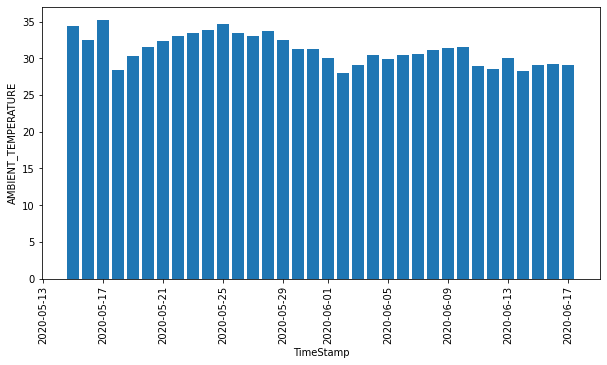

In [31]:
# plot nTimeStamp for AMBIENT_TEMPERATURE
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetSD1['date'], datasetSD1['AMBIENT_TEMPERATURE'])

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('AMBIENT_TEMPERATURE')



Text(0, 0.5, 'MODULE_TEMPERATURE')

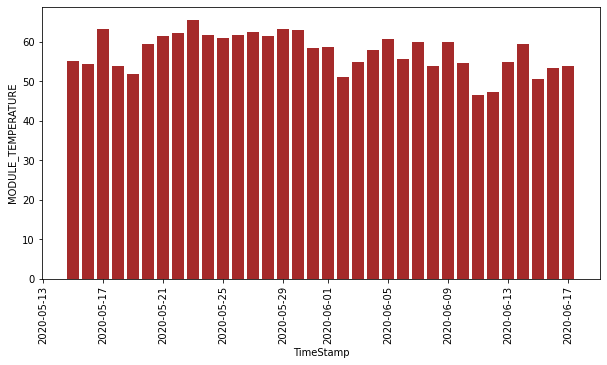

In [32]:
# plot nTimeStamp for MODULE_TEMPERATURE
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(datasetSD1['date'], datasetSD1['MODULE_TEMPERATURE'], color = 'brown')

# Add labels for X and Y
plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('MODULE_TEMPERATURE')


Text(0, 0.5, 'IRRADIATION')

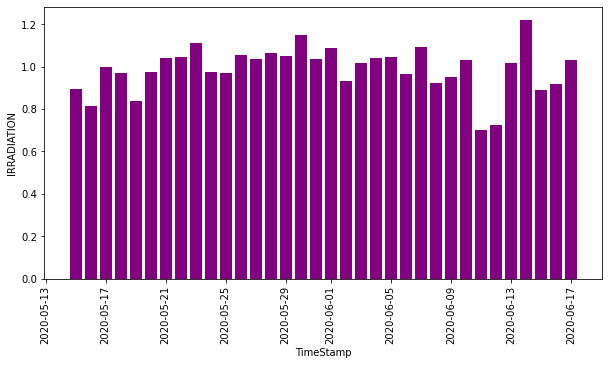

In [34]:
# plot nTimeStamp for IRRADIATION
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(datasetSD1['date'], datasetSD1['IRRADIATION'], color = 'purple')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('IRRADIATION')

